# This jupyter notebook is prepared by Matthias Rathbun.

# 1. Load Data and perform basic EDA 
<hr>
<ol type="I">
  <li>import libraries: pandas, numpy, matplotlib (set %matplotlib inline), matplotlib’s pyplot, seaborn, missingno, scipy’s stats, sklearn (1 pt) </li>
  <li>import the data to a dataframe and show the count of rows and columns (1 pt)</li>
  <li>Show the top 5 and last 5 rows (1 pt)</li>
  <li>Show how many columns have null values</li>
  <li>Plot the count of target and discuss its imbalances and probably issues and solutions</li>
</ol>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
from scipy import stats
import sklearn
%matplotlib inline

In [2]:
df = pd.read_csv("hrdata2.csv", index_col = False)
df = df.iloc[: , 1:]
df.shape

(8955, 14)

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0
1,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4,8,0.0
2,402,city_46,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,>4,18,1.0
3,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,1,46,1.0
4,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5.0,5000-9999,Pvt Ltd,1,108,0.0


In [4]:
df.tail()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
8950,21319,city_21,0.624,Male,No relevent experience,Full time course,Graduate,STEM,1.0,100-500,Pvt Ltd,1,52,1.0
8951,251,city_103,0.920,Male,Has relevent experience,no_enrollment,Masters,STEM,9.0,50-99,Pvt Ltd,1,36,1.0
8952,32313,city_160,0.920,Female,Has relevent experience,no_enrollment,Graduate,STEM,10.0,100-500,Public Sector,3,23,0.0
8953,29754,city_103,0.920,Female,Has relevent experience,no_enrollment,Graduate,Humanities,7.0,10/49,Funded Startup,1,25,0.0
8954,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,21.0,50-99,Pvt Ltd,4,44,0.0


In [5]:
df.isna().sum().sort_values(ascending = False)

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

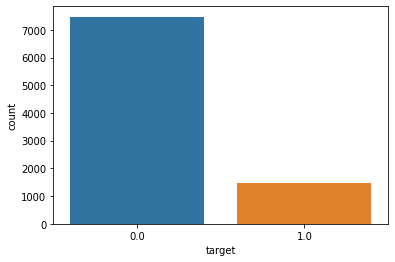

In [6]:
ax = sns.countplot(x="target", data=df)

There is imbalance in the dataset. This can be fixed using resampling.

# 2. Feature Selection and Pre-processing 
<hr>
<ol type="I">
  <li>Preprocessing City:</li>
  <ol type="I">
  <li>Plot #of records per city so that the highest city counts are shown in descending order</li>
  <li>How many rows belong to the top 4 cities in total and how many for the remaining?</li>
  <li>Replace the city name with <b><i>city_others</i></b> if the city name is not within the top 4 city names. This <a href="https://stackoverflow.com/questions/31128477/how-to-set-values-based-on-a-list-in-pandas-python">link</a> might help you. (Also, converting the list to a set and then doing a set difference might help you as well)</li>
  <li>Show some sample data that the records have changed appropriately</li>
  </ol>
  <li>Education Level:</li>
  <ol type="I">
  <li>Show the unique values of education level.</li>
  <li>Replace the value of Education level column like ordinal values, "Graduate" -> 0, Masters->1, and Phd -> 2 (writing a function with the condition and return values and using apply with the data frame can help you to achieve this.)</li>
  <li>Show some sample data that the records have changed appropriately</li>
  </ol>
  <li>company_size column:</li>
  <ol type="I">
  <li>Show the unique values of the company_size column</li>
  <li>Change the values of the company_size column from 0 to 7 where e0 is < 10 and 7 is 10000z. The order of the numbers should be based on the values of the column-like an ordinary variable. (writing a function with the condition and return values and using apply with the data frame can help you to achieve this.)</li>
  <li>Show the updated unique values</li>
  </ol>
  <li>Last_new_job:</li>
  <ol type="I">
  <li>Show the unique values of the last_new_job column</li>
  <li>Convert the values of this column to never->0, 1->1,....>4 -->5</li>
  <li>Show the updated values</li>
  </ol>
  <li>Other columns:</li>
  <ol type="I">
  <li>Show the unique values of company_type, major_descipline, enrolled_university, relevant_experience, gender, and updated city column</li>
  <li>As one-hot encoding is a bit strict, use panda's get_dummies function to create binary columns for the values of the following columns:</li>
  <ol type="I">
  <li>company_tye</li>
  <li>major_descipline</li>
  <li>enrolled_university</li>
  <li>relevant_eperience</li>
  <li>gender</li>
  <li>updated city column</li>
  </ol></ol>
  <li>Show the top 5 and last 5 rows to show that the table has changed [You must set this first before showing the data frame as many columns will be hidden due to the large number of columns:
pd.set_option('display.max_columns', None)
Also, show the shape of the table
Drop the enrollee_id and any duplicate columns (if you have multiple city column one with actual and one with updated, then remove the actual one)</li>
  <li>Feature Scaling:</li>
  <ol type="I">
  <li>Use sklearn.preprocessing's MinMaxScaler to perform min max scaling to all the columns (see documentation on how to use it)</li>
  <li>Show sample records that show some the scaled records</li>
  </ol>
  <li>Move the target column to the last column of the data frame and show that it has changed</li>


In [7]:
df['city'].value_counts()

city_103    2426
city_21     1111
city_16      836
city_114     648
city_160     401
            ... 
city_127       1
city_107       1
city_62        1
city_109       1
city_25        1
Name: city, Length: 116, dtype: int64

5021 are in the top 4 and 3934 are in the other cities

In [8]:
df.loc[~df["city"].isin(["city_103", "city_21", "city_16", "city_114"]), "city"] = "city_others"

In [9]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,29725,city_others,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0
1,666,city_others,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,21.0,50-99,Funded Startup,4,8,0.0
2,402,city_others,0.762,Male,Has relevent experience,no_enrollment,Graduate,STEM,13.0,<10,Pvt Ltd,>4,18,1.0
3,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,7.0,50-99,Pvt Ltd,1,46,1.0
4,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,5.0,5000-9999,Pvt Ltd,1,108,0.0


In [10]:
df['education_level'].value_counts()

Graduate    6252
Masters     2449
Phd          254
Name: education_level, dtype: int64

In [11]:
df.loc[df["education_level"].isin(["Graduate"]), "education_level"] = 0
df.loc[df["education_level"].isin(["Masters"]), "education_level"] = 1
df.loc[df["education_level"].isin(["Phd"]), "education_level"] = 2
df['education_level'] = df['education_level'].astype("int64")

In [12]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,29725,city_others,0.776,Male,No relevent experience,no_enrollment,0,STEM,15.0,50-99,Pvt Ltd,>4,47,0.0
1,666,city_others,0.767,Male,Has relevent experience,no_enrollment,1,STEM,21.0,50-99,Funded Startup,4,8,0.0
2,402,city_others,0.762,Male,Has relevent experience,no_enrollment,0,STEM,13.0,<10,Pvt Ltd,>4,18,1.0
3,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,7.0,50-99,Pvt Ltd,1,46,1.0
4,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,5.0,5000-9999,Pvt Ltd,1,108,0.0


In [13]:
df['company_size'].value_counts()

50-99        1986
100-500      1814
10000+       1449
10/49         951
1000-4999     930
<10           840
500-999       592
5000-9999     393
Name: company_size, dtype: int64

In [14]:
df.loc[df["company_size"].isin(["<10"]), "company_size"] = 0
df.loc[df["company_size"].isin(["10/49"]), "company_size"] = 1
df.loc[df["company_size"].isin(["50-99"]), "company_size"] = 2
df.loc[df["company_size"].isin(["100-500"]), "company_size"] = 3
df.loc[df["company_size"].isin(["500-999"]), "company_size"] = 4
df.loc[df["company_size"].isin(["1000-4999"]), "company_size"] = 5
df.loc[df["company_size"].isin(["5000-9999"]), "company_size"] = 6
df.loc[df["company_size"].isin(["10000+"]), "company_size"] = 7
df['company_size'] = df['company_size'].astype("int64")

In [15]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,29725,city_others,0.776,Male,No relevent experience,no_enrollment,0,STEM,15.0,2,Pvt Ltd,>4,47,0.0
1,666,city_others,0.767,Male,Has relevent experience,no_enrollment,1,STEM,21.0,2,Funded Startup,4,8,0.0
2,402,city_others,0.762,Male,Has relevent experience,no_enrollment,0,STEM,13.0,0,Pvt Ltd,>4,18,1.0
3,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,7.0,2,Pvt Ltd,1,46,1.0
4,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,5.0,6,Pvt Ltd,1,108,0.0


In [16]:
df['last_new_job'].value_counts()

1        3838
>4       1965
2        1570
3         610
4         599
never     373
Name: last_new_job, dtype: int64

In [17]:
df.loc[df["last_new_job"].isin(["never"]), "last_new_job"] = 0
df.loc[df["last_new_job"].isin(["1"]), "last_new_job"] = 1
df.loc[df["last_new_job"].isin(["2"]), "last_new_job"] = 2
df.loc[df["last_new_job"].isin(["3"]), "last_new_job"] = 3
df.loc[df["last_new_job"].isin(["4"]), "last_new_job"] = 4
df.loc[df["last_new_job"].isin([">4"]), "last_new_job"] = 5
df['last_new_job'] = df['last_new_job'].astype("int64")


In [18]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,29725,city_others,0.776,Male,No relevent experience,no_enrollment,0,STEM,15.0,2,Pvt Ltd,5,47,0.0
1,666,city_others,0.767,Male,Has relevent experience,no_enrollment,1,STEM,21.0,2,Funded Startup,4,8,0.0
2,402,city_others,0.762,Male,Has relevent experience,no_enrollment,0,STEM,13.0,0,Pvt Ltd,5,18,1.0
3,27107,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,7.0,2,Pvt Ltd,1,46,1.0
4,23853,city_103,0.920,Male,Has relevent experience,no_enrollment,0,STEM,5.0,6,Pvt Ltd,1,108,0.0


In [19]:
df['company_type'].value_counts()

Pvt Ltd                6794
Funded Startup          784
Public Sector           564
Early Stage Startup     385
NGO                     356
Other                    72
Name: company_type, dtype: int64

In [20]:
df['major_discipline'].value_counts()

STEM               7989
Humanities          378
Other               177
Business Degree     170
Arts                129
No Major            112
Name: major_discipline, dtype: int64

In [21]:
df['enrolled_university'].value_counts()

no_enrollment       7594
Full time course     832
Part time course     529
Name: enrolled_university, dtype: int64

In [22]:
df['relevent_experience'].value_counts()

Has relevent experience    7851
No relevent experience     1104
Name: relevent_experience, dtype: int64

In [23]:
df['gender'].value_counts()

Male      8073
Female     804
Other       78
Name: gender, dtype: int64

In [24]:
df['city'].value_counts()

city_others    3934
city_103       2426
city_21        1111
city_16         836
city_114        648
Name: city, dtype: int64

In [25]:
df = pd.get_dummies(data=df, columns=['company_type', 'major_discipline', 'enrolled_university', 'relevent_experience', 'gender', 'city'])

In [26]:
pd.set_option('display.max_columns', None)

In [27]:
df = df.iloc[: , 1:]

In [28]:
s = df.pop('target')
df = pd.concat([df, s], 1)

C:\Users\matth\AppData\Local\Temp\ipykernel_28248\858452946.py:2: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only.
  df = pd.concat([df, s], 1)


In [29]:
df

,city_development_index,education_level,experience,company_size,last_new_job,training_hours,company_type_Early Stage Startup,company_type_Funded Startup,company_type_NGO,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,major_discipline_Arts,major_discipline_Business Degree,major_discipline_Humanities,major_discipline_No Major,major_discipline_Other,major_discipline_STEM,enrolled_university_Full time course,enrolled_university_Part time course,enrolled_university_no_enrollment,relevent_experience_Has relevent experience,relevent_experience_No relevent experience,gender_Female,gender_Male,gender_Other,city_city_103,city_city_114,city_city_16,city_city_21,city_city_others,target
0,0.776,0,15.0,2,5,47,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,1,0.0
1,0.767,1,21.0,2,4,8,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,0.0
2,0.762,0,13.0,0,5,18,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,0,1,1.0
3,0.920,0,7.0,2,1,46,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1.0
4,0.920,0,5.0,6,1,108,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8950,0.624,0,1.0,3,1,52,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,0,0,1,0,1.0
8951,0.920,1,9.0,2,1,36,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,1.0
8952,0.920,0,10.0,3,3,23,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0.0
8953,0.920,0,7.0,1,1,25,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,1,0,0,0,0,0.0


In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data = scaler.fit_transform(df)

# 3. X/Y and Training/Test Split with stratified sampling and SMOTE
<hr>
<ol type="I">
  <li>Copy all the features into X and the target to Y</li>
  <li>Show the ratio of 1 and 0 in Y</li>
  <li>Use sklearn's train_test_split to split the data set into training and test sets. There should be 30% records in the test set. The random_stat should be 0. As we want to have the same ratio of 0 and 1 in the test set, use the stratify parameter to the Y.</li>
  <li>Show the ratio of 0 and 1 in y_train and then y_test</li>
  <li>Rebalance:</li>
  <ol type="I">
  <li> Use imblearn's SMOTE to balance the x_train (<a href="https://imbalanced-learn.org/stable/over_sampling.html">Help Link</a>)  (section 2.1.2)</li>
  </ol>
  <li>Show the ratio of 0 and 1 in Y_train after rebalancing. (do you have 50% of each class now?)</li>
</ol>

In [31]:
X = data[:,:-1]
y = data[:,-1]

In [32]:
ratio_hires = sum(y)/len(y)
ratio_no_hire = (len(y) - sum(y))/len(y)
print("Ratio hired = {}\nRatio not hired = {}".format(ratio_hires,ratio_no_hire))

Ratio hired = 0.16560580681183695
Ratio not hired = 0.834394193188163


In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0, stratify = y)

In [34]:
ratio_hires = sum(y_train)/len(y_train)
ratio_no_hire = (len(y_train) - sum(y_train))/len(y_train)
print("Ratio hired = {}\nRatio not hired = {}".format(ratio_hires,ratio_no_hire))

Ratio hired = 0.1656030631780472
Ratio not hired = 0.8343969368219528


In [35]:
ratio_hires = sum(y_test)/len(y_test)
ratio_no_hire = (len(y_test) - sum(y_test))/len(y_test)
print("Ratio hired = {}\nRatio not hired = {}".format(ratio_hires,ratio_no_hire))

Ratio hired = 0.1656122069222181
Ratio not hired = 0.8343877930777819


In [36]:
X_unbalanced_train = X_train
y_unbalanced_train = y_train

In [37]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [38]:
ratio_hires = sum(y_train)/len(y_train)
ratio_no_hire = (len(y_train) - sum(y_train))/len(y_train)
print("Ratio hired = {}\nRatio not hired = {}".format(ratio_hires,ratio_no_hire))

Ratio hired = 0.5
Ratio not hired = 0.5


# 4. PCA and Logistic Regression
<hr>
<ol type="I">
  <li>As we have many features now, we would like to do principal component analysis (you have learned it in datacamp). As part of ti, create pipeline to find how many dimensions give you the best logistic regression model. You can follow <a href="https://machinelearningmastery.com/principal-components-analysis-for-dimensionality-reduction-in-python/">this link</a> (consider using the code right before the plot). But you need to use our balanced training set in this experiment. Also, number of features should be based on how many maximum features do we have so far. This question should produce a plot and based on that you need to decide how many features would you like to use.</li>
  <li>Based on the number of features chosen in the above step, use the test set to evaluate the model for accuracy (the code right after the plot can give you an idea about it.). Use sklearn.metrics import accuracy_score for accuracy (the google colab link in the classification module should help with it)</li>
  <li>Show the confusion matrix and interpret the numbers in the confusion matrix (the google colab link in the classification module should help with it)</li>
  <li>Show precision, recall, and f1 score ((the google colab link in the classification module should help with it)). Note that all of these scores should be calculated based on the test set and predicted result for the test set</li>
  <li>Plot ROC curve and find AUC (the same google colab link should help you)</li>
  <li>Plot precision-recall curve for different thresholds and discuss the plot</li>
</ol>



In [39]:
# compare pca number of components with logistic regression algorithm for classification
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot



# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,31):
		steps = [('pca', PCA(n_components=i)), ('m', LogisticRegression())]
		models[str(i)] = Pipeline(steps=steps)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.681 (0.012)
>2 0.690 (0.013)
>3 0.690 (0.013)
>4 0.692 (0.014)
>5 0.701 (0.013)
>6 0.702 (0.013)
>7 0.711 (0.013)
>8 0.723 (0.010)
>9 0.722 (0.011)
>10 0.729 (0.011)
>11 0.729 (0.011)
>12 0.729 (0.011)
>13 0.728 (0.012)
>14 0.727 (0.012)
>15 0.729 (0.011)
>16 0.728 (0.012)
>17 0.727 (0.012)
>18 0.728 (0.013)
>19 0.728 (0.013)
>20 0.733 (0.012)
>21 0.733 (0.011)
>22 0.732 (0.011)
>23 0.732 (0.011)
>24 0.733 (0.012)
>25 0.733 (0.012)
>26 0.733 (0.012)
>27 0.733 (0.012)
>28 0.733 (0.012)
>29 0.733 (0.012)
>30 0.733 (0.012)


In [40]:
# define the model
steps = [('pca', PCA(n_components=15)), ('m', LogisticRegression())]
model = Pipeline(steps=steps)
# fit the model on the whole dataset
model.fit(X_train, y_train)
# make a single prediction
y_pred = model.predict(X_test)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.819129140305173

In [42]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1950,  292],
       [ 194,  251]], dtype=int64)

In [43]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_test, y_pred)

0.4622467771639042

In [44]:
recall_score(y_test, y_pred)

0.5640449438202247

In [45]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.5080971659919028

In [46]:
from sklearn.model_selection import cross_val_predict
y_scores = cross_val_predict(model, X_train, y_train, cv=3, method="decision_function")

In [47]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

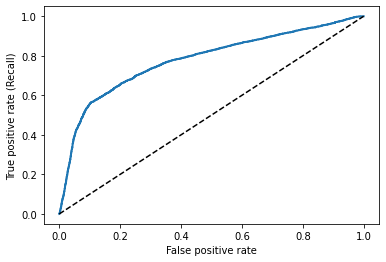

In [48]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
 
plot_roc_curve(fpr, tpr)

plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.show()

In [49]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train, y_scores)

0.7788520595622401

In [50]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)


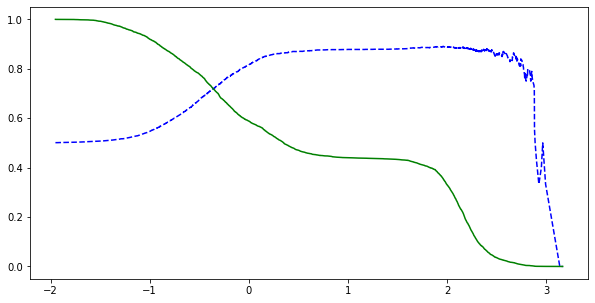

In [51]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
 #[...] # highlight the threshold, add the legend, axis label and grid

plt.figure(figsize=(10,5))
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()
#dotted line precision, solid line recall

Precision generally goes up when the threshold is increased but may somethimes go down making it bumpy near the end, recall always goes down when threshold is increased.

# 5. Softmaxt regression:
<hr>
1.   How softmax regression is related to logistic regression? What library can you use for softmax regression?

Softmax regression is a generalization of logistic regression applied to multiclass classification. Softmax can be used in the TensorFlow Library.

# 6. KNN <b style="color:red">(Always use rebalanced training set for training, if it is not specified which training set to use)</b>
<hr>
<ol type="1">
  <li> Use sklearn's KNN classifier to train (with k=  10) and predict the model based on the unbalanced training set (the training set before rebalancing) and test it and show the confusion matrix and classification report </li>

  <li> Use sklearn's KNN classifier to train (with k=  10) and predict the model based on the rebalanced training set and test it and show the confusion matrix and classification report </li>

  <li> Use grid search to tune the following hyperparameters of KNN: number of neighbors (between 1 and 20), weights  (uniform or distance), and metrics (Euclidean, Manhattan, or Minkowski)istance) to use for KNN. While creating an instance of GridSearchCV, use multiple evaluation metrics such as AUC and accuracy based on the example available at <a href="https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#:~:text=Plotting%20the%20result-,Demonstration%20of%20multi-">Link to Sklearn</a>
  
  Link to sklearn (Links to an external site.). Also some helpful links and codes: <a href="https://github.com/oguzhankir/Hyperparameter_Tuning/tree/main/Knn_tuning">GitHub Example</a>
  and <a href="https://www.youtube.com/watch?v=TvB_3jVIHhg">Youtube Video</a>
  </li>
 
  <li> The above grid search process can take a couple of minutes. After completing the process, print the best_params_ </li>

  <li> Based on the result from grid search, use the parameters to train a model, test it with test set, and then print the confusion matrix and classification report. Also, show the AUC of ROC. </li>

  <li> Use PCA and based on that train model, test it and then print the confusion matrix and classification report. Also, show the AUC of ROC.</li>
  
  <li> A short discussion on the 4 models and their differences. </li>
</ol>

In [52]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_unbalanced_train, y_unbalanced_train)

KNeighborsClassifier(n_neighbors=10)

In [53]:
y_pred = classifier.predict(X_test)

In [54]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2153   89]
 [ 307  138]]
              precision    recall  f1-score   support

         0.0       0.88      0.96      0.92      2242
         1.0       0.61      0.31      0.41       445

    accuracy                           0.85      2687
   macro avg       0.74      0.64      0.66      2687
weighted avg       0.83      0.85      0.83      2687



In [55]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=10)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [56]:
y_pred = classifier.predict(X_test)

In [58]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1724  518]
 [ 178  267]]
              precision    recall  f1-score   support

         0.0       0.91      0.77      0.83      2242
         1.0       0.34      0.60      0.43       445

    accuracy                           0.74      2687
   macro avg       0.62      0.68      0.63      2687
weighted avg       0.81      0.74      0.77      2687



In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer

scoring = {"AUC": "roc_auc", "Accuracy": make_scorer(accuracy_score)}

# Setting refit='AUC', refits an estimator on the whole dataset with the
# parameter setting that has the best cross-validated AUC score.
# That estimator is made available at ``gs.best_estimator_`` along with
# parameters like ``gs.best_score_``, ``gs.best_params_`` and
# ``gs.best_index_``
gs = GridSearchCV(
    KNeighborsClassifier(),
    param_grid={"n_neighbors": range(1, 21), "weights":["uniform","distance"], "p":[1, 2]},
    scoring=scoring,
    refit="AUC",
    return_train_score=True,
    n_jobs = -1,
    cv = 3,
    verbose = 3
)
gs.fit(X_train, y_train)
results = gs.cv_results_

Fitting 3 folds for each of 80 candidates, totalling 240 fits


In [59]:
gs.best_params_

{'n_neighbors': 6, 'p': 1, 'weights': 'distance'}

In [59]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5, p = 1, weights = "distance")
classifier.fit(X_train, y_train)

KNeighborsClassifier(p=1, weights='distance')

In [60]:
y_pred = classifier.predict(X_test)

In [61]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1795  447]
 [ 207  238]]
              precision    recall  f1-score   support

         0.0       0.90      0.80      0.85      2242
         1.0       0.35      0.53      0.42       445

    accuracy                           0.76      2687
   macro avg       0.62      0.67      0.63      2687
weighted avg       0.81      0.76      0.78      2687



In [62]:
roc_auc_score(y_test, y_pred)

0.6677279515681224

In [63]:
# get a list of models to evaluate
def get_models():
	models = dict()
	for i in range(1,31):
		steps = [('pca', PCA(n_components=i)), ('m', KNeighborsClassifier(n_neighbors=5, p = 1, weights = "distance"))]
		models[str(i)] = Pipeline(steps=steps)
	return models

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
	return scores
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))

>1 0.646 (0.011)
>2 0.723 (0.014)
>3 0.785 (0.013)
>4 0.800 (0.011)
>5 0.811 (0.010)
>6 0.814 (0.010)
>7 0.815 (0.014)
>8 0.817 (0.011)
>9 0.828 (0.011)
>10 0.830 (0.011)
>11 0.834 (0.012)
>12 0.836 (0.012)
>13 0.836 (0.011)
>14 0.840 (0.010)
>15 0.842 (0.010)
>16 0.844 (0.010)
>17 0.845 (0.012)
>18 0.849 (0.011)
>19 0.851 (0.011)
>20 0.854 (0.011)
>21 0.854 (0.011)
>22 0.854 (0.011)
>23 0.854 (0.010)
>24 0.854 (0.010)
>25 0.855 (0.010)
>26 0.855 (0.010)
>27 0.855 (0.010)
>28 0.855 (0.010)
>29 0.855 (0.010)
>30 0.855 (0.010)


In [64]:
steps = [('pca', PCA(n_components=15)), ('m', KNeighborsClassifier(n_neighbors=5, p = 1, weights = "distance"))]
model = Pipeline(steps=steps)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
roc_auc_score(y_test, y_pred)

0.6574607342962243

All models perform similarly as they are based on the same platform, the knn. The main difference is in the optimization. Even the optimized models seem to not have much of an effect on the models accuracy on the test data, showing a better optimization algorithm is needed, potentially TPE algorithm.

In [69]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
import time
seed = 0
metric = 'accuracy'
kFoldSplits = 5
np.random.seed(seed)
best_score=1.0
def objective(space):
    
    global best_score
    model = KNeighborsClassifier(**space)   
    kfold = StratifiedKFold(n_splits=kFoldSplits, random_state=seed, shuffle=True) # KFold is also an option.
    score = 1-cross_val_score(model, X_train, y_train, cv=kfold, scoring=metric, verbose=False).mean() 
    # Careful here (score). The objective function will be  minimized, thus somme treatment on your score might be needed.
    
    if (score < best_score):
        best_score=score
    
    return score 

In [72]:
from hyperopt import hp, fmin, tpe, rand, STATUS_OK, Trials

space = {
      'n_neighbors': hp.choice('n_neighbors',  range(1, 21)),
      'weights': hp.choice('weights',['uniform', 'distance']),
      'metric':hp.choice('metrics', ["manhattan", "euclidean", "minkowski"])
      }

In [73]:
n_iter_hopt = 200
trials = Trials() # Initialize an empty trials database for further saving/loading ran iteractions

start = time.time()

best = fmin(objective, 
            space = space, 
            algo = tpe.suggest, 
            max_evals = n_iter_hopt,
            trials = trials,
            rstate = np.random.default_rng(seed))

elapsed_time_hopt = time.time() - start

100%|█████████████████████████████████████████████| 200/200 [05:11<00:00,  1.56s/trial, best loss: 0.11797323135755255]


In [74]:
print("\nHyperopt search took %.2f seconds for %d candidates. Accuracy reached: %.3f\nOptimal parameters found: %s" % (elapsed_time_hopt, n_iter_hopt, ((1-best_score)*100), best))


Hyperopt search took 311.04 seconds for 200 candidates. Accuracy reached: 88.203
Optimal parameters found: {'metrics': 0, 'n_neighbors': 0, 'weights': 1}


# 7. Naive Bayes
<hr>
<ol type="1">
  <li> Train a model with GaussianNB, test it and then print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the <b>count of the number of misclassification.</b> </li>

  <li> Train a model with CategoricalNB, test it and then print the confusion matrix and classification report. Also, plot ROC curve, and show the AUC of ROC and the <b>count of the number of misclassification.</b> </li>
</ol>

In [141]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1140 1102]
 [ 116  329]]
              precision    recall  f1-score   support

         0.0       0.91      0.51      0.65      2242
         1.0       0.23      0.74      0.35       445

    accuracy                           0.55      2687
   macro avg       0.57      0.62      0.50      2687
weighted avg       0.80      0.55      0.60      2687



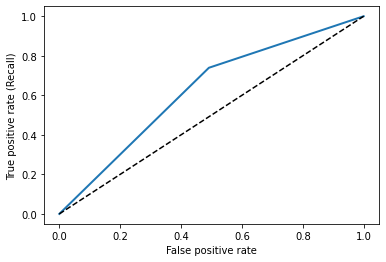

In [142]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
 
plot_roc_curve(fpr, tpr)

plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.show()

In [143]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6239002094839079

In [144]:
from sklearn.naive_bayes import CategoricalNB
clf = CategoricalNB()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1902  340]
 [ 203  242]]
              precision    recall  f1-score   support

         0.0       0.90      0.85      0.88      2242
         1.0       0.42      0.54      0.47       445

    accuracy                           0.80      2687
   macro avg       0.66      0.70      0.67      2687
weighted avg       0.82      0.80      0.81      2687



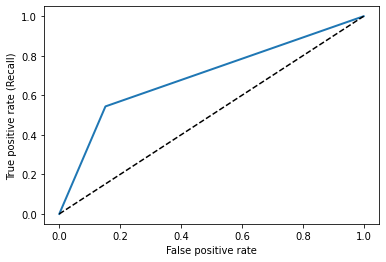

In [145]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
 
plot_roc_curve(fpr, tpr)

plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.show()

In [146]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6960849562489351

### Count of the number of misclassification
Gaussian = 1102 + 116 </br>
Categorical = 340 + 203

# 8. Support Vector Machine 
<hr>
<ol type="1">
  <li> Build a support vector machine model using SVC. Use grid search to tune some parameters and then based on that show the best parameters found. </li>

  <li> Test the model and print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the <b>count of the number of misclassification.</b> </li>
</ol>

In [39]:
from sklearn.svm import SVC
import time

In [41]:
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.model_selection import cross_val_score
seed = 0
metric = 'accuracy'
kFoldSplits = 5
np.random.seed(seed)
best_score=1.0
def objective(space):
    
    global best_score
    model = SVC(**space)   
    kfold = StratifiedKFold(n_splits=kFoldSplits, random_state=seed, shuffle=True) # KFold is also an option.
    score = 1-cross_val_score(model, X_train, y_train, cv=kfold, scoring=metric, verbose=False).mean() 
    # Careful here (score). The objective function will be  minimized, thus somme treatment on your score might be needed.
    
    if (score < best_score):
        best_score=score
    
    return score 

In [42]:
from hyperopt import hp, fmin, tpe, rand, STATUS_OK, Trials

space = {
      'C': hp.choice('C',  [0.1,1, 10, 100]),
      'kernel': hp.choice('kernel',['sigmoid', 'poly', 'rbf']),
      'gamma':hp.choice('gamma',[1,0.1,0.01,0.001])
      }

In [43]:
n_iter_hopt = 10
trials = Trials() # Initialize an empty trials database for further saving/loading ran iteractions

start = time.time()

best = fmin(objective, 
            space = space, 
            algo = tpe.suggest, 
            max_evals = n_iter_hopt,
            trials = trials,
            rstate = np.random.default_rng(seed))

elapsed_time_hopt = time.time() - start

100%|█████████████████████████████████████████████████| 10/10 [02:09<00:00, 12.93s/trial, best loss: 0.258699808795411]


In [44]:
print("\nHyperopt search took %.2f seconds for %d candidates. Accuracy reached: %.3f\nOptimal parameters found: %s" % (elapsed_time_hopt, n_iter_hopt, ((1-best_score)*100), best))


Hyperopt search took 129.33 seconds for 10 candidates. Accuracy reached: 74.130
Optimal parameters found: {'C': 1, 'gamma': 1, 'kernel': 1}


Ideally you'd want to run this 100 times to get a full spread.

In [105]:
model = SVC(C = 1, gamma = 0.1, kernel = "poly")
model.fit(X_train,y_train)

SVC(C=1, gamma=0.1, kernel='poly')

In [106]:
y_pred = model.predict(X_test)

In [107]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1908  334]
 [ 182  263]]
              precision    recall  f1-score   support

         0.0       0.91      0.85      0.88      2242
         1.0       0.44      0.59      0.50       445

    accuracy                           0.81      2687
   macro avg       0.68      0.72      0.69      2687
weighted avg       0.83      0.81      0.82      2687



Number of miscalculation = 334 + 182

# 9. Decision Tree 
<hr>
<ol type="1">
  <li> Build a decision tree model using sklearns DecisionTreeClassifier. Use the unbalanced training set, entropy as the criterion. Try with different max_depth (or use grid search). After building model, test it and print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the <b> count of the number of misclassification. Show the decision tree. (you can simply import tree from sklearn and call tree.plot_tree with your model and the call plt.show. At the beginning of this process, use plt.figure to change the figsize) </b> </li>

  <li> Perform the same tasks as 9.1 with the balanced training set </li>
  <li> Discuss any difference and also discuss part of the tree of 9.2 </li> 
</ol>

In [83]:
from sklearn.tree import DecisionTreeClassifier
def objective(space):
    
    global best_score
    model = DecisionTreeClassifier(**space)   
    kfold = StratifiedKFold(n_splits=kFoldSplits, random_state=seed, shuffle=True) # KFold is also an option.
    score = 1-cross_val_score(model, X_unbalanced_train, y_unbalanced_train, cv=kfold, scoring=metric, verbose=False).mean() 
    # Careful here (score). The objective function will be  minimized, thus somme treatment on your score might be needed.
    
    if (score < best_score):
        best_score=score
    
    return score 

In [117]:
space = {
      'criterion': "entropy",
        "max_depth": hp.choice("max_depth", range(1,51))
      }

In [85]:
n_iter_hopt = 200
trials = Trials() # Initialize an empty trials database for further saving/loading ran iteractions

start = time.time()

best = fmin(objective, 
            space = space, 
            algo = tpe.suggest, 
            max_evals = n_iter_hopt,
            trials = trials,
            rstate = np.random.default_rng(seed))

elapsed_time_hopt = time.time() - start

100%|█████████████████████████████████████████████| 200/200 [00:15<00:00, 12.62trial/s, best loss: 0.13608920727415286]


In [86]:
print("\nHyperopt search on unbalanced data took %.2f seconds for %d candidates. Accuracy reached: %.3f\nOptimal parameters found: %s" % (elapsed_time_hopt, n_iter_hopt, ((1-best_score)*100), best))


Hyperopt search on unbalanced data took 15.85 seconds for 200 candidates. Accuracy reached: 86.391
Optimal parameters found: {'max_depth': 2}


In [87]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 2)
model.fit(X_unbalanced_train, y_unbalanced_train)
y_pred = model.predict(X_test)

In [88]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2071  171]
 [ 205  240]]
              precision    recall  f1-score   support

         0.0       0.91      0.92      0.92      2242
         1.0       0.58      0.54      0.56       445

    accuracy                           0.86      2687
   macro avg       0.75      0.73      0.74      2687
weighted avg       0.86      0.86      0.86      2687



Missclassification = 171 + 205

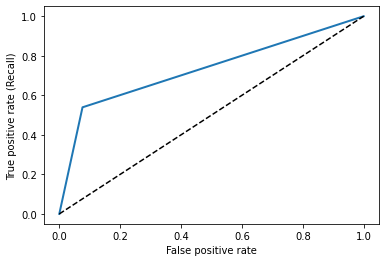

In [90]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
 
plot_roc_curve(fpr, tpr)

plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.show()

In [91]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7315273281279756

In [118]:
from sklearn.tree import DecisionTreeClassifier
def objective(space):
    
    global best_score
    model = DecisionTreeClassifier(**space)   
    kfold = StratifiedKFold(n_splits=kFoldSplits, random_state=seed, shuffle=True) # KFold is also an option.
    score = 1-cross_val_score(model, X_train, y_train, cv=kfold, scoring=metric, verbose=False).mean() 
    # Careful here (score). The objective function will be  minimized, thus somme treatment on your score might be needed.
    
    if (score < best_score):
        best_score=score
    
    return score 

In [119]:
n_iter_hopt = 200
trials = Trials() # Initialize an empty trials database for further saving/loading ran iteractions

start = time.time()

best = fmin(objective, 
            space = space, 
            algo = tpe.suggest, 
            max_evals = n_iter_hopt,
            trials = trials,
            rstate = np.random.default_rng(seed))

elapsed_time_hopt = time.time() - start

100%|██████████████████████████████████████████████| 200/200 [00:36<00:00,  5.55trial/s, best loss: 0.1605162523900573]


In [120]:
print("\nHyperopt search on balanced data took %.2f seconds for %d candidates. Accuracy reached: %.3f\nOptimal parameters found: %s" % (elapsed_time_hopt, n_iter_hopt, ((1-best_score)*100), best))


Hyperopt search on balanced data took 36.11 seconds for 200 candidates. Accuracy reached: 86.391
Optimal parameters found: {'max_depth': 33}


In [125]:
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 34)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [126]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1890  352]
 [ 258  187]]
              precision    recall  f1-score   support

         0.0       0.88      0.84      0.86      2242
         1.0       0.35      0.42      0.38       445

    accuracy                           0.77      2687
   macro avg       0.61      0.63      0.62      2687
weighted avg       0.79      0.77      0.78      2687



Misclassification = 352 + 258

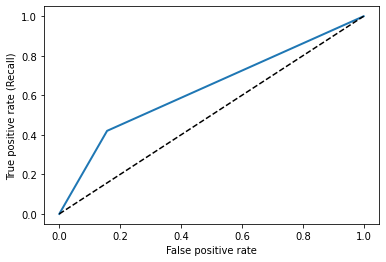

In [127]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
 
plot_roc_curve(fpr, tpr)

plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.show()

In [128]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6316110214595716

This difference in acuracy could be due to the imbalance present in the testing set not present in the training set as it was ballanced. This could impair the model learning from the instances that are more common.

# 10. Random Forest 
<hr>
<ol type="1">
  <li> Use grid search to tune the max_depth, min_samples_leaf, and n_estimators  (<a href="https://www.analyticsvidhya.com/blog/2021/06/understanding-random-forest/">helpful link</a>)
  [it may take about 5 minutes.] </li>

  <li> Print the best estimator. </li>
  <li> Train the model. After building the model, test it and print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the count of the number of misclassification. </li> 
</ol>

In [98]:
from sklearn.ensemble import RandomForestClassifier
def objective(space):
    
    global best_score
    model = RandomForestClassifier(**space)   
    kfold = StratifiedKFold(n_splits=kFoldSplits, random_state=seed, shuffle=True) # KFold is also an option.
    score = 1-cross_val_score(model, X_train, y_train, cv=kfold, scoring=metric, verbose=False).mean() 
    # Careful here (score). The objective function will be  minimized, thus somme treatment on your score might be needed.
    
    if (score < best_score):
        best_score=score
    
    return score 

In [100]:
space = {
        "max_depth": hp.choice("max_depth", [2,3,5,10,20]),
    "min_samples_leaf": hp.choice("min_samples_leaf", [5,10,20,50,100,200]),
    "n_estimators": hp.choice("n_estimators", [10,25,30,50,100,200])
      }

In [103]:
n_iter_hopt = 50
trials = Trials() # Initialize an empty trials database for further saving/loading ran iteractions

start = time.time()

best = fmin(objective, 
            space = space, 
            algo = tpe.suggest, 
            max_evals = n_iter_hopt,
            trials = trials,
            rstate = np.random.default_rng(seed))

elapsed_time_hopt = time.time() - start

100%|███████████████████████████████████████████████| 50/50 [01:24<00:00,  1.68s/trial, best loss: 0.13910133843212225]


In [104]:
print("\nHyperopt search took %.2f seconds for %d candidates. Accuracy reached: %.3f\nOptimal parameters found: %s" % (elapsed_time_hopt, n_iter_hopt, ((1-best_score)*100), best))


Hyperopt search took 84.24 seconds for 50 candidates. Accuracy reached: 86.391
Optimal parameters found: {'max_depth': 4, 'min_samples_leaf': 0, 'n_estimators': 5}


In [108]:
model = RandomForestClassifier(max_depth = 20, min_samples_leaf = 5, n_estimators =200)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [111]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2047  195]
 [ 204  241]]
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      2242
         1.0       0.55      0.54      0.55       445

    accuracy                           0.85      2687
   macro avg       0.73      0.73      0.73      2687
weighted avg       0.85      0.85      0.85      2687



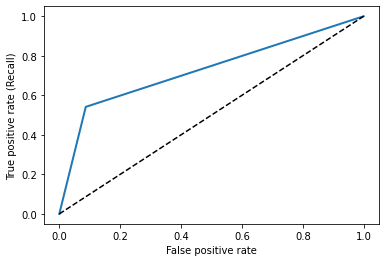

In [109]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
 
plot_roc_curve(fpr, tpr)

plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.show()

In [110]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7272985596728442

Misclassification = 195 + 204

# 11. Boosting Algorithms
<hr>
<ol type="1">
  <li> Train an AdaBoostClassifier model with some manual/grid search-based parameters and then test it and then print the confusion matrix and classification report. Also, plot ROC curve and show the AUC of ROC, and the <b> count of the number of misclassification. </b> </li>

  <li> <b> Do the same for Gradient BoostingClassifier <br>
  Helpful links: </b>
  <a href="https://www.analyticsvidhya.com/blog/2015/11/quick-introduction-boosting-algorithms-machine-learning/#:~:text=Types%20of%20Boosting%20Algorithms&text=AdaBoost%20(Adaptive%20Boosting),XGBoost">Help Link</a>
   <br> 

  <b> Another link:</b> <a href="https://www.machinelearningplus.com/machine-learning/an-introduction-to-gradient-boosting-decision-trees/">Another help link</a>
  </li>
</ol>



In [129]:
from sklearn.ensemble import AdaBoostClassifier
def objective(space):
    
    global best_score
    model = AdaBoostClassifier(**space)   
    kfold = StratifiedKFold(n_splits=kFoldSplits, random_state=seed, shuffle=True) # KFold is also an option.
    score = 1-cross_val_score(model, X_train, y_train, cv=kfold, scoring=metric, verbose=False).mean() 
    # Careful here (score). The objective function will be  minimized, thus somme treatment on your score might be needed.
    
    if (score < best_score):
        best_score=score
    
    return score 

In [130]:
space = {
    "n_estimators": hp.choice("n_estimators", np.arange(25,100,5)),
    "learning_rate": hp.choice("learning_rate", np.round(np.arange(0.005,0.3,0.01),5))
      }

In [132]:
n_iter_hopt = 50
trials = Trials() # Initialize an empty trials database for further saving/loading ran iteractions

start = time.time()

best = fmin(objective, 
            space = space, 
            algo = tpe.suggest, 
            max_evals = n_iter_hopt,
            trials = trials,
            rstate = np.random.default_rng(seed))

elapsed_time_hopt = time.time() - start

100%|███████████████████████████████████████████████| 50/50 [01:22<00:00,  1.65s/trial, best loss: 0.19847036328871892]


In [133]:
print("\nHyperopt search took %.2f seconds for %d candidates. Accuracy reached: %.3f\nOptimal parameters found: %s" % (elapsed_time_hopt, n_iter_hopt, ((1-best_score)*100), best))


Hyperopt search took 82.70 seconds for 50 candidates. Accuracy reached: 86.391
Optimal parameters found: {'learning_rate': 28, 'n_estimators': 14}


In [137]:
model = AdaBoostClassifier(learning_rate = np.round(np.arange(0.005,0.3,0.01),5)[28], n_estimators = np.arange(25,100,5)[14])
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [138]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2036  206]
 [ 201  244]]
              precision    recall  f1-score   support

         0.0       0.91      0.91      0.91      2242
         1.0       0.54      0.55      0.55       445

    accuracy                           0.85      2687
   macro avg       0.73      0.73      0.73      2687
weighted avg       0.85      0.85      0.85      2687



Number Misclassification = 206 + 201

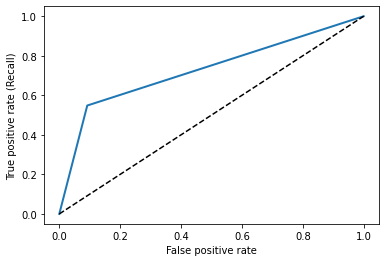

In [139]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
 
plot_roc_curve(fpr, tpr)

plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.show()

In [140]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.7282161793743547

In [153]:
space={
            'max_depth': hp.choice('x_max_depth',[2,3,4,5,6]),
            'learning_rate':hp.choice('x_learning_rate',np.round(np.arange(0.005,0.3,0.01),5)),
            'subsample':hp.choice('x_subsample',np.round(np.arange(0.1,1.0,0.05),5)),
            'n_estimators':hp.choice('x_n_estimators',np.arange(25,100,5))
            }

In [156]:
from sklearn.ensemble import GradientBoostingClassifier
def objective(space):
    
    global best_score
    model = GradientBoostingClassifier(**space)   
    kfold = StratifiedKFold(n_splits=kFoldSplits, random_state=seed, shuffle=True) # KFold is also an option.
    score = 1-cross_val_score(model, X_train, y_train, cv=kfold, scoring=metric, verbose=False).mean() 
    # Careful here (score). The objective function will be  minimized, thus somme treatment on your score might be needed.
    
    if (score < best_score):
        best_score=score
    
    return score 

In [157]:
n_iter_hopt = 50
trials = Trials() # Initialize an empty trials database for further saving/loading ran iteractions

start = time.time()

best = fmin(objective, 
            space = space, 
            algo = tpe.suggest, 
            max_evals = n_iter_hopt,
            trials = trials,
            rstate = np.random.default_rng(seed))

elapsed_time_hopt = time.time() - start

100%|███████████████████████████████████████████████| 50/50 [02:14<00:00,  2.69s/trial, best loss: 0.09235181644359469]


In [158]:
print("\nHyperopt search took %.2f seconds for %d candidates. Accuracy reached: %.3f\nOptimal parameters found: %s" % (elapsed_time_hopt, n_iter_hopt, ((1-best_score)*100), best))


Hyperopt search took 134.65 seconds for 50 candidates. Accuracy reached: 90.765
Optimal parameters found: {'x_learning_rate': 20, 'x_max_depth': 4, 'x_n_estimators': 11, 'x_subsample': 17}


In [161]:
model = GradientBoostingClassifier(learning_rate = np.round(np.arange(0.005,0.3,0.01),5)[20], max_depth = 6, subsample = np.round(np.arange(0.1,1.0,0.05),5)[17], n_estimators = np.arange(25,100,5)[11])
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [162]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2089  153]
 [ 262  183]]
              precision    recall  f1-score   support

         0.0       0.89      0.93      0.91      2242
         1.0       0.54      0.41      0.47       445

    accuracy                           0.85      2687
   macro avg       0.72      0.67      0.69      2687
weighted avg       0.83      0.85      0.84      2687



Number Misclassification = 153 + 262

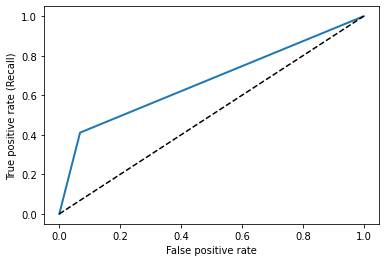

In [163]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
 
plot_roc_curve(fpr, tpr)

plt.xlabel("False positive rate")
plt.ylabel("True positive rate (Recall)")
plt.show()

In [164]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, y_pred)

0.6714966572783129

# 12. Final Discussion
<hr>

Finally, briefly discuss your finding such as which model could be most suitable for this given scenario and what could be your future work based on this experiment.

Based on AUC ROC score, Logistic regression seems to be the best model. Potential future work could include deep learning on the unballanced dataset. Use of Gaussian optimization as used for some examples would also replace the inefficient grid search

![Based](Based.png)